# 5.3. Flow Classification Visualization

We use **CTU-13 dataset, malware capture 43**. This notebook visualizes the final models.

In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import pandas as pd
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
from global_helper import *
from helper import *
from itertools import product

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

## Load data

In [4]:
%%time

# Read file and preprocess columns (takes ~1.5min)
# Only loads the traffic associated with the provided IP address.
df = load_data("../data/capture20110811.pcap.netflow.labeled")

Wall time: 1min 2s


In [5]:
df.head(5)

,duration,protocol,flags,tos,packets,bytes,flows,label,src_ip,src_port,dest_ip,dest_port
2011-08-11 10:10:00.003,0.967,UDP,INT,0,2,135,1,Background,89.31.8.11,23929,147.32.84.229,13363
2011-08-11 10:10:00.003,0.967,UDP,INT,0,2,276,1,Background,147.32.84.229,13363,89.31.8.11,23929
2011-08-11 10:10:00.006,0.000,UDP,INT,0,1,62,1,Background,208.88.186.6,34042,147.32.84.229,13363
2011-08-11 10:10:00.008,0.000,UDP,INT,0,1,78,1,Background,92.118.218.77,55246,147.32.84.229,13363
2011-08-11 10:10:00.009,0.000,UDP,INT,0,1,72,1,Background,182.185.139.181,10223,147.32.84.229,13363


## Visualize packet classifier performance

In [8]:
X_packets, y_packets = preprocess_df_packets(df, False)

C:\Users\CodeSupply\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\CodeSupply\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


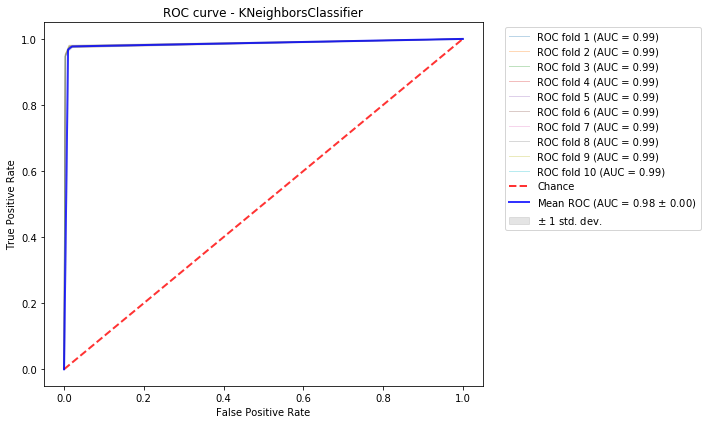

In [23]:
p_confmat, p_precision, p_recall, p_f1, p_mean_auc, p_std_auc = roc_cross_val(X_packets, y_packets, KNeighborsClassifier(2))

In [39]:
print("Precision: %.3f\nRecall:    %.3f\nF1-Score:  %.3f\nAUC:       %.3f +/- %.3f" % (p_precision, p_recall, p_f1, p_mean_auc, p_std_auc))

Precision: 0.986
Recall:    0.949
F1-Score:  0.967
AUC:       0.983 +/- 0.001


In [41]:
p_confmat[["Botnet", "Legitimate", "Total"]]

,Botnet,Legitimate,Total
Botnet,51677,2756,54433
Legitimate,759,224577,225336
Total,52436,227333,279769


## Visualize hosts classifier performance

In [25]:
X_hosts, y_hosts = preprocess_df_hosts(df, False)

C:\Users\CodeSupply\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\CodeSupply\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


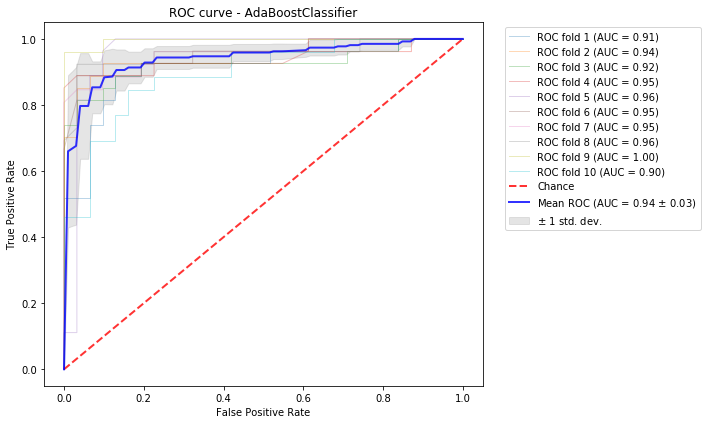

In [26]:
h_confmat, h_precision, h_recall, h_f1, h_mean_auc, h_std_auc = roc_cross_val(X_hosts, y_hosts, AdaBoostClassifier())

In [37]:
print("Precision: %.3f\nRecall:    %.3f\nF1-Score:  %.3f\nAUC:       %.3f +/- %.3f" % (h_precision, h_recall, h_f1, h_mean_auc, h_std_auc))

Precision: 0.903
Recall:    0.872
F1-Score:  0.887
AUC:       0.940 +/- 0.026


In [42]:
h_confmat[["Botnet", "Legitimate", "Total"]]

,Botnet,Legitimate,Total
Botnet,232,34,266
Legitimate,25,285,310
Total,257,319,576
